In [6]:
import pandas as pd
# Buat data penjualan toko
data = {
    "Tanggal": ["2025-03-01", "2025-03-02", "2025-03-03", "2025-03-04", "2025-03-05", "2025-03-06", "2025-03-07", "2025-03-08", "2025-03-09", "2025-03-10"],
    "Produk": ["Roko", "kopi", "Susu", "Sabun", "Shampo",
               "Kecap", "Mie instan", "Tepung", "Sikat", "Saus Sambal"],
    "Jumlah Terjual": [10, 8, 12, 10, 6, 13, 9, 11, 7, 15],
    "Stok": [25, 15, 20, 22, 18, 30, 28, 22, 19, 26],
    "Harga Satuan": [15000, 2000, 3000, 5000, 2000, 10000, 14000, 25000, 11000, 13000]
}

# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan.csv", index=False)

In [7]:
#membaca file CSV
df =pd.read_csv("data_penjualan.csv")

#menampilkan 5 data pertama
print(df.head())

      Tanggal  Produk  Jumlah Terjual  Stok  Harga Satuan
0  2025-03-01    Roko              10    25         15000
1  2025-03-02    kopi               8    15          2000
2  2025-03-03    Susu              12    20          3000
3  2025-03-04   Sabun              10    22          5000
4  2025-03-05  Shampo               6    18          2000


In [8]:
#cek apa ada data yang kosong
print(df.isnull().sum())

#konvers kolom tanggal ke format datetime
df["Tanggal"]=pd.to_datetime(df["Tanggal"])
df["Total Penjualan"]=df["Jumlah Terjual"] *df["Harga Satuan"]
df["Keuntungan"]=df["Total Penjualan"] - (df["Jumlah Terjual"]*10000)

print(df.head())


Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
     Tanggal  Produk  Jumlah Terjual  Stok  Harga Satuan  Total Penjualan  \
0 2025-03-01    Roko              10    25         15000           150000   
1 2025-03-02    kopi               8    15          2000            16000   
2 2025-03-03    Susu              12    20          3000            36000   
3 2025-03-04   Sabun              10    22          5000            50000   
4 2025-03-05  Shampo               6    18          2000            12000   

   Keuntungan  
0       50000  
1      -64000  
2      -84000  
3      -50000  
4      -48000  


In [9]:
!pip install scikit-learn

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (x) dan target (y)
x = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int) # 1 jika stok kurang dari 5, 0 jika cukup

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model =DecisionTreeClassifier()
model.fit(x_train, y_train)

# Evaluasi model
y_pred =model.predict(x_test)
print("Akurasi Model: ", accuracy_score(y_test, y_pred))



Akurasi Model:  1.0


In [14]:
produk_baru=[[8,3]]
prediksi=model.predict(produk_baru)

if prediksi[0]==1:
  print("produk perlu di restock")
else:
  print("stock cukup")

stock cukup


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


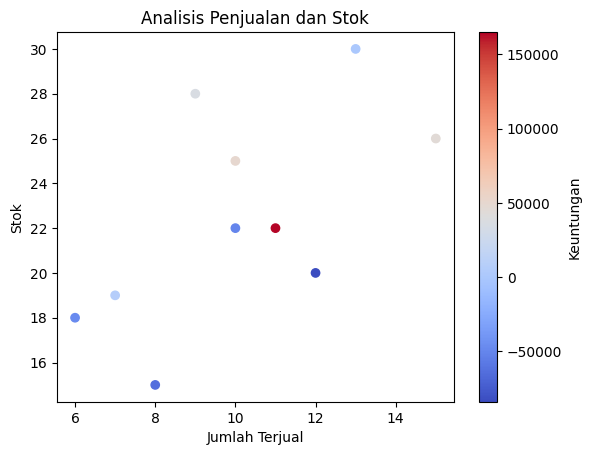

In [15]:
import matplotlib.pyplot as plt
plt.scatter (df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar (label="Keuntungan")
plt.show()